### User input analyzing data of multiple replications

For analyzing multiple simulations, a template code [^1], create_replications.ipynb, Multi_run_analysis.ipynb, Cell_Substrate.py, and pyMCDS.py [^2] are placed in the same folder. First, open the create_replications.ipynb using IDE (e.g., PyCharm and Google Colab). This file will generate replications. All replications used in the manuscript are available upon request.

Then, open the Multi_run_analysis.ipynb and update group name in following code block using the template code folder name. The following example is for template folder D and 15 replications.


[^1]: https://github.com/ashleefv/covid19fibrosis/tree/master/Template%20of%20in%20silico%20experiments
[^2]: https://github.com/ashleefv/covid19fibrosis/tree/master/Analysis

In [1]:
group = 'D'
replication = 15

### Importing required files and libraries

In [2]:
from pyMCDS import pyMCDS
from Cell_Substrate import SVGTab

import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
import seaborn as sns

### Creating output folder "plot" to save the output plots

In [3]:
root_directory = os.getcwd()
try:
    os.chdir(group)
except:
    print('Add a template directory for simulation')
    
path = root_directory+ '\\' + group + '\\'

path2 = path + 'plot'
try:
    os.chdir(path2)
except:
    os.mkdir('plot')

### Generating overlaying plot for cell and collagen and seaborn heatmap to quantify fibrotic areas

The following code block will extract data for CD8+ T cells, macrophages, secreting_agents, fibroblasts, uninfected cells, infected cells, dead cells, TGF-β, collagen, and population of macrophage phenotypes (M1, M2, MI, MH, and ME).

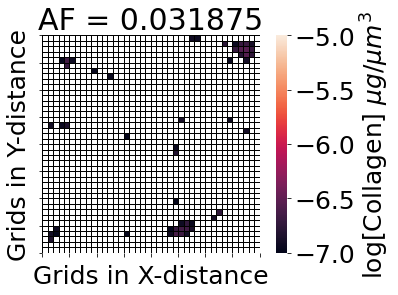

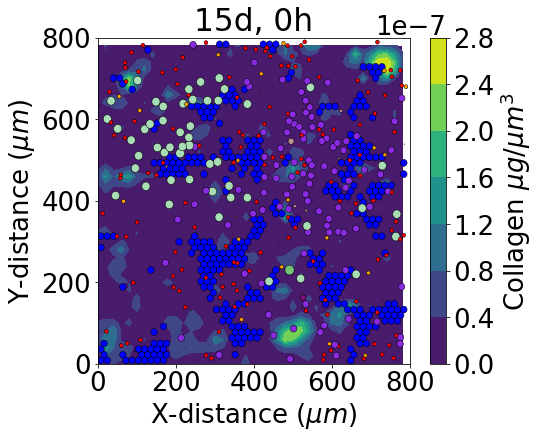

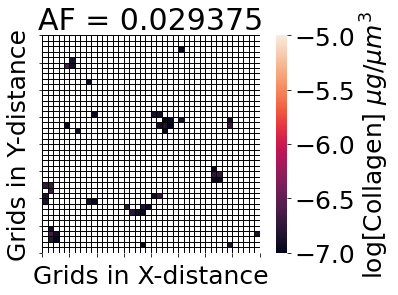

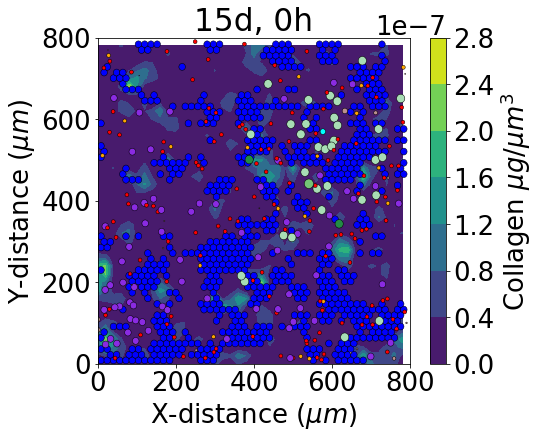

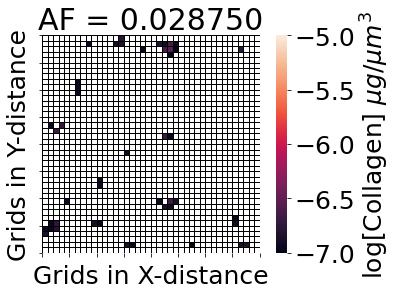

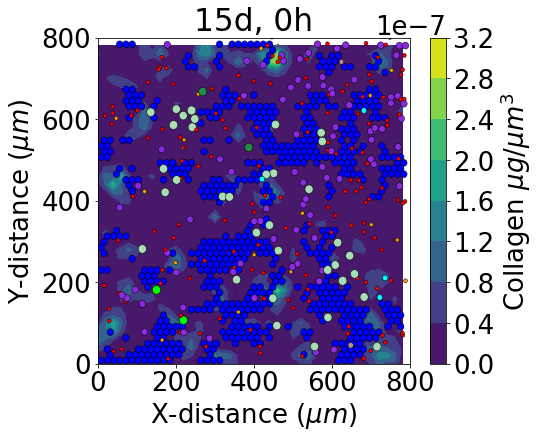

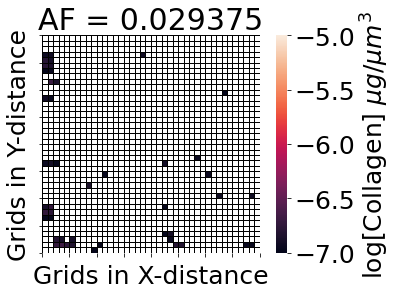

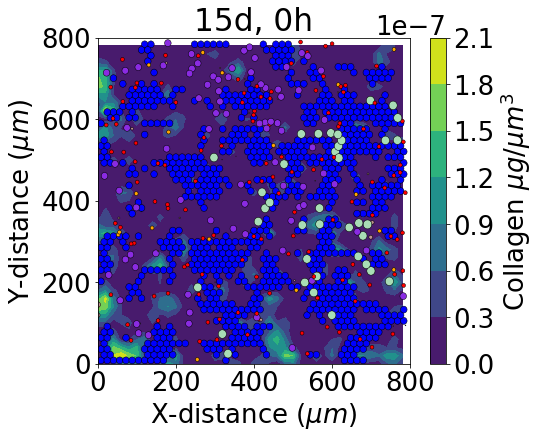

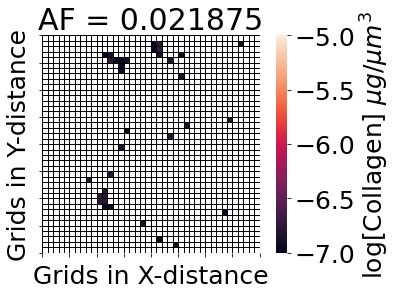

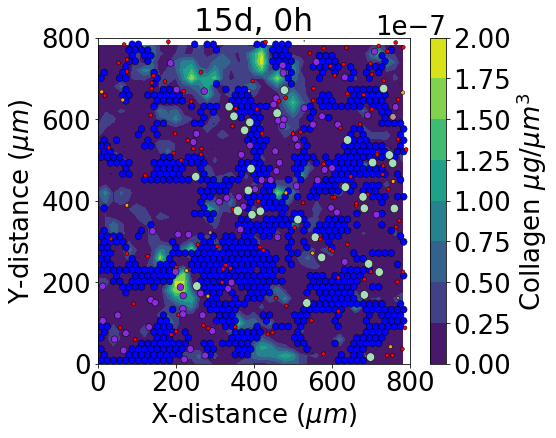

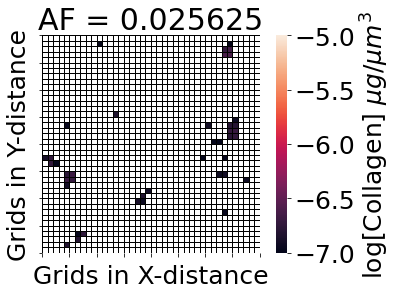

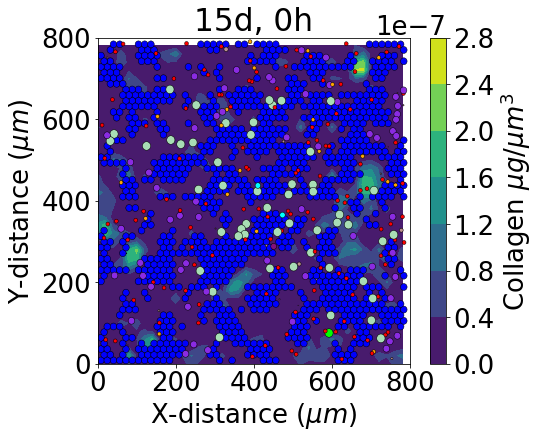

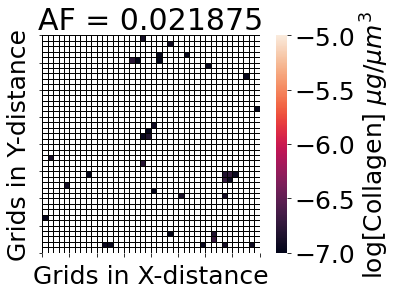

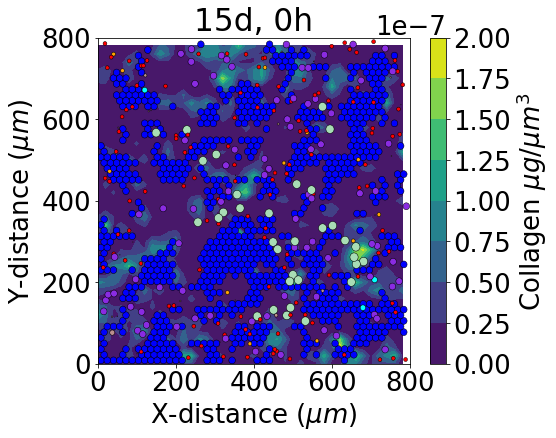

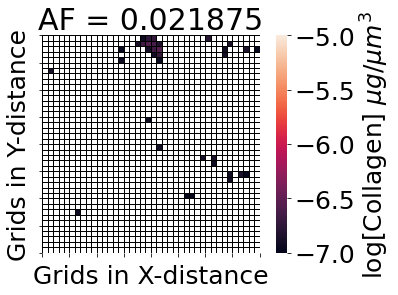

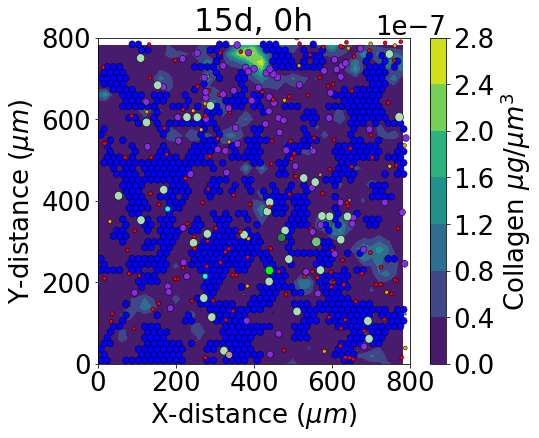

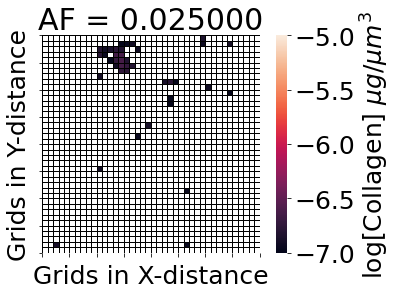

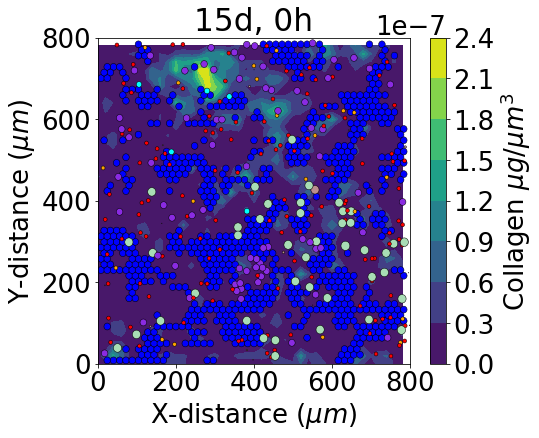

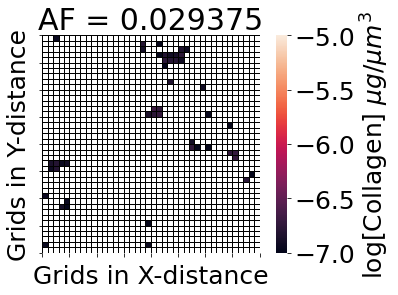

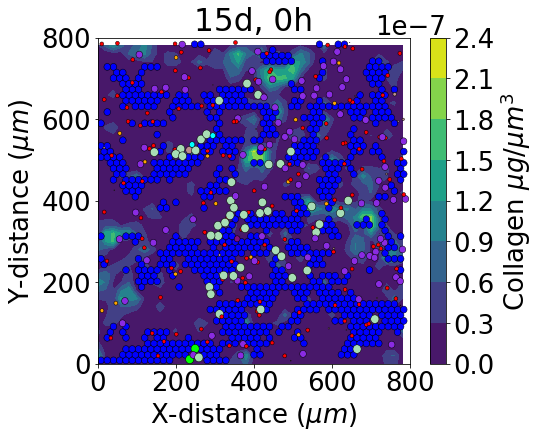

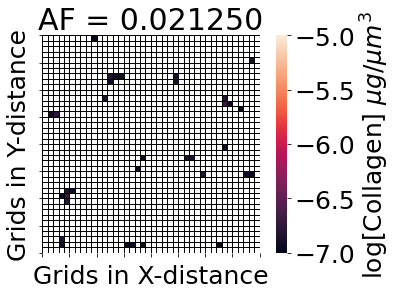

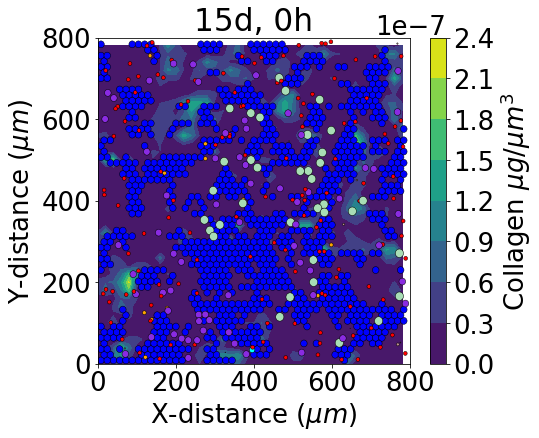

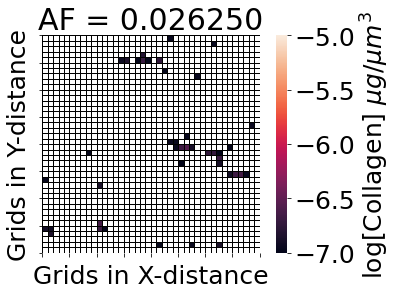

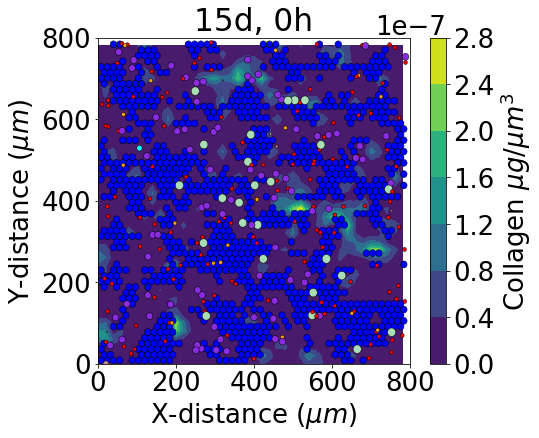

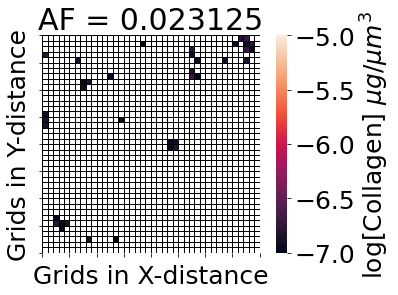

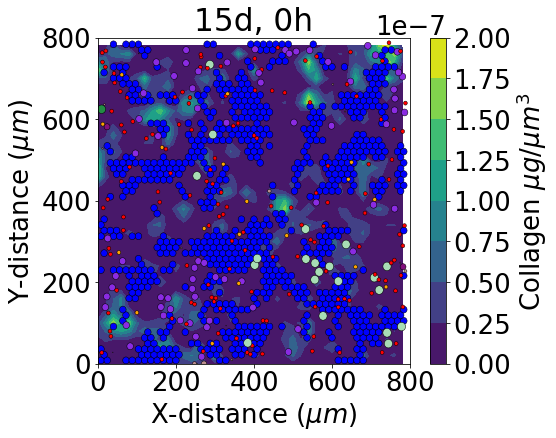

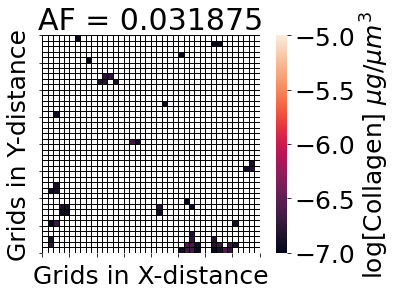

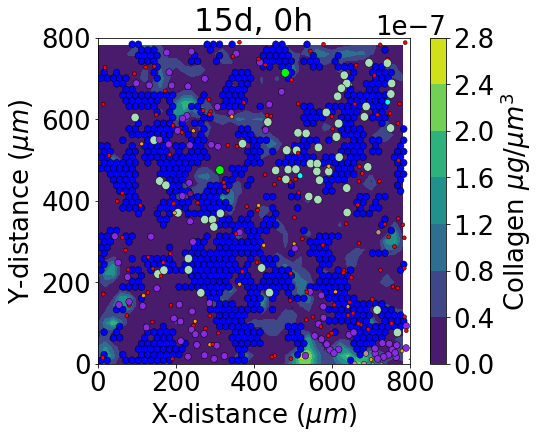

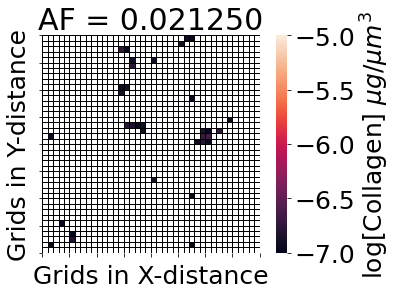

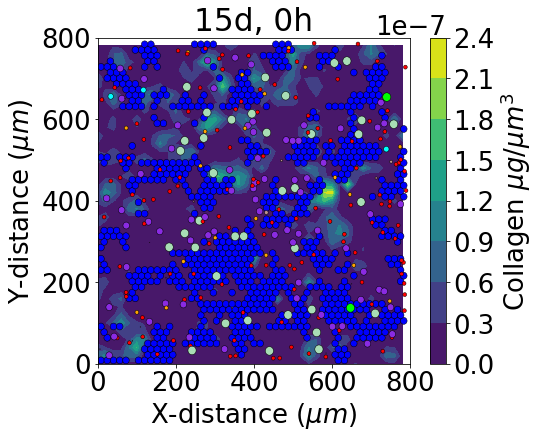

In [4]:
collagen_area = np.zeros(replication)
for replication in range(replication):
    itc = replication + 1
    path1 = path + str(itc) + '\output'
    os.chdir(path1)
    xml_files = glob.glob('output*.xml')
    xml_files.sort()

    n = len(xml_files)
    t = np.zeros(n)
    uninfected = np.zeros(n)
    infected = np.zeros(n)
    dead = np.zeros(n)
    CD8 = np.zeros(n)
    macrophage = np.zeros(n)
    secreting_agent = np.zeros(n)
    fibroblast = np.zeros(n)
    viron = np.zeros(n)
    collagen = np.zeros(n)
    TGF = np.zeros(n)
    pro = np.zeros(n)
    M1 = np.zeros(n)
    M2 = np.zeros(n)
    MI = np.zeros(n)
    MH = np.zeros(n)
    ME = np.zeros(n)
    idx = 0
    TGFa = [[] for _ in range(n)]
    collagena = [[] for _ in range(n)]
    timea = [[] for _ in range(n)]

    mcds1 = pyMCDS(xml_files[-1], '.')
    t_final = mcds1.get_time()

    for f in xml_files:
        mcds = pyMCDS(f, '.')
        t[idx] = mcds.get_time()

        cycle = mcds.data['discrete_cells']['cycle_model']
        cycle = cycle.astype(int)
        phase = mcds.data['discrete_cells']['ability_to_phagocytose_infected_cell']
        phase = phase.astype(int)
        active = mcds.data['discrete_cells']['activated_immune_cell']
        active = active.astype(int)
        ex = mcds.data['discrete_cells']['M2_phase']
        ex = ex.astype(int)
        ex2 = mcds.data['discrete_cells']['total_volume']
        ex2 = ex2.astype(int)
        cell_type = mcds.data['discrete_cells']['cell_type']
        cell_type = cell_type.astype(int)


        ID_uninfected = np.where((mcds.data['discrete_cells']['assembled_virion'] < 1) & (cycle < 100) & (
                    mcds.data['discrete_cells']['cell_type'] == 1))
        ID_infected = np.where((mcds.data['discrete_cells']['assembled_virion'] >= 1) & (cycle < 100) & (
                    mcds.data['discrete_cells']['cell_type'] == 1))
        dead_ID = np.where((cycle >= 100) & (mcds.data['discrete_cells']['cell_type'] == 1))
        uninfected[idx] = len(ID_uninfected[0])
        infected[idx] = len(ID_infected[0])

        dead[idx] = len(dead_ID[0])

        ID_CD8 = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 3))

        CD8[idx] = len(ID_CD8[0])
        ID_fibroblast = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 8))

        fibroblast[idx] = len(ID_fibroblast[0])

        ID_macrophage = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 4))
        macrophage[idx] = len(ID_macrophage[0])

        ID_secreting_agent = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 9))
        secreting_agent[idx] = len(ID_secreting_agent[0])

        mac1 = np.where((cell_type == 4) & (cycle < 100) & (active == 1) & (ex == 0))
        M1[idx] = len(mac1[0])
        mac2 = np.where((cell_type == 4) & (cycle < 100) & (ex == 1))
        M2[idx] = len(mac2[0])
        mac3 = np.where((cell_type == 4) & (cycle < 100) & (active == 0))
        MI[idx] = len(mac3[0])
        mac4 = np.where((cell_type == 4) & (cycle < 100) & (phase == 1))
        MH[idx] = len(mac4[0])
        mac5 = np.where((cell_type == 4) & (cycle < 100) & (ex2 > 6500))
        ME[idx] = len(mac5[0])

        z_val = 0.00
        sum = 0.0
        sum1 = 0.0
        xx1 = np.ravel(mcds.get_mesh()[:][0][0])

        plane_oxy = mcds.get_concentrations('collagen', z_slice=z_val)
        plane_oxy1 = mcds.get_concentrations('anti-inflammatory cytokine', z_slice=z_val)

         # saving end data point of substrate
        if t[idx] == t_final:
            pickle.dump(plane_oxy, open('baseline.p', 'wb'))


        # average concentration
        count_average = 0
        for i in range(len(xx1)):
            for j in range(len(xx1)):
                sum = sum + plane_oxy[i][j]
                sum1 = sum1 + plane_oxy1[i][j]*1e12
                count_average = count_average + 1


        # individual grid concentration
        for i in range(len(xx1)):
            for j in range(len(xx1)):
                TGFa[idx].append(plane_oxy1[i][j]*1e12)
                collagena[idx].append(plane_oxy[i][j])
                timea[idx].append(mcds.get_time()/(60*24))

        collagen[idx] = sum/(count_average)
        TGF[idx] = sum1/(count_average)

        idx += 1


    cell1 = np.array([CD8, macrophage, secreting_agent, fibroblast, uninfected, infected, dead, TGF, collagen, M1, M2, MI, MH, ME])


    os.chdir(path2)
    pickle.dump(t / (60 * 24), open('time.p', 'wb'))
    pickle.dump(cell1, open('cell'+str(itc)+'.p', 'wb'))

    os.chdir(path1)
    # Seaborn heatmap
    plane_oxy = np.array(pickle.load(open('baseline.p', 'rb')))
    xx1 = np.linspace(0,800,40)
    yy1 = np.linspace(0,800,40)

    log_data = [ [0]*len(xx1) for i in range(len(yy1))]
    threshold_u = 1e-5
    threshold = 1e-7

    for i in range(len(xx1)):
        for j in range(len(yy1)):
            if plane_oxy[i][j] <= threshold:
                log_data[i][j] = np.nan

            if plane_oxy[i][j] > threshold:
                log_data[i][j] = np.log10(plane_oxy[i][j])


    count3 = 0
    count4= 0
    for i in range(len(log_data)):
        for j in range(len(log_data)):
            if np.isnan(log_data[i][j]):
                count3 = count3 + 1
            else:
                count4 = count4 + 1
    areaf = count4/1600

    collagen_area[replication] = areaf

    plt.rcParams.update({'font.size': 25})
    ax = sns.heatmap(log_data, linewidths=0, linecolor='black', square=True, vmin=(np.log10(threshold)), vmax=(np.log10(threshold_u)), cbar_kws={'label': 'log[Collagen] $μg/μm^3$', 'orientation': 'vertical'}, linewidth=0.5)
    ax.set_xlabel('Grids in X-distance')
    ax.set_ylabel('Grids in Y-distance')
    ax.invert_yaxis()
    plt.title('AF = %f' %areaf)
    plt.xticks(np.arange(0, 42, step=5))
    plt.yticks(np.arange(0, 42, step=5))

    os.chdir(path2)
    plt.savefig(group + "_Collagen_heatmap_" + str(itc)+".png", dpi=300, bbox_inches='tight')
    plt.show()
    
    pathCC = path + str(itc)
    os.chdir(pathCC)
    a = SVGTab()
    plt.rcParams.update({'font.size': 26})
    a.plot_svg(n-1)
    os.chdir(path2)
    plt.savefig(group + "_Cells_Collagen_" + str(itc)+".png", dpi=300, bbox_inches='tight')
    plt.show()

### Generating plot for mean cell population, macrophage phenotypes, TGF-β, and collagen

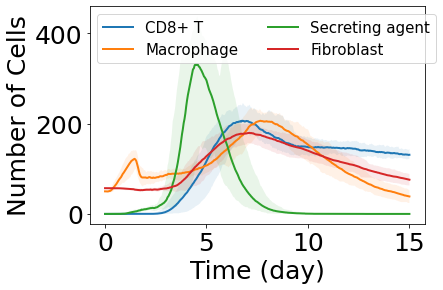

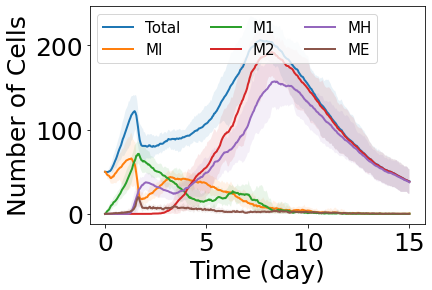

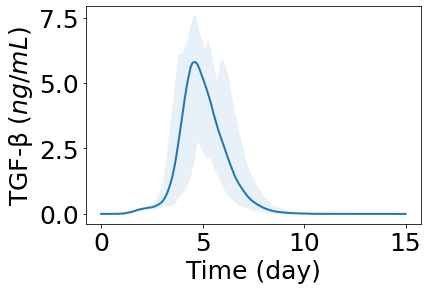

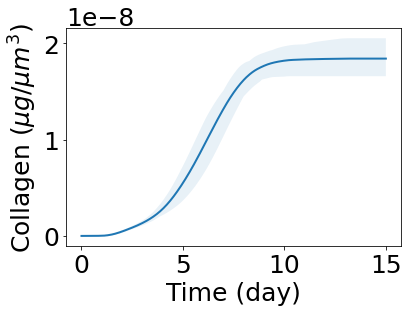

In [5]:
os.chdir(path2)
cell1 = np.array(pickle.load(open('cell1.p', 'rb')))
cell2 = np.array(pickle.load(open('cell2.p', 'rb')))
cell3 = np.array(pickle.load(open('cell3.p', 'rb')))
cell4 = np.array(pickle.load(open('cell4.p', 'rb')))
cell5 = np.array(pickle.load(open('cell5.p', 'rb')))
cell6 = np.array(pickle.load(open('cell6.p', 'rb')))
cell7 = np.array(pickle.load(open('cell7.p', 'rb')))
cell8 = np.array(pickle.load(open('cell8.p', 'rb')))
cell9 = np.array(pickle.load(open('cell9.p', 'rb')))
cell10 = np.array(pickle.load(open('cell10.p', 'rb')))
cell11 = np.array(pickle.load(open('cell11.p', 'rb')))
cell12 = np.array(pickle.load(open('cell12.p', 'rb')))
cell13 = np.array(pickle.load(open('cell13.p', 'rb')))
cell14 = np.array(pickle.load(open('cell14.p', 'rb')))
cell15 = np.array(pickle.load(open('cell15.p', 'rb')))
time = np.array(pickle.load(open('time.p', 'rb')))

CD8 = np.array([cell1[0],cell2[0],cell3[0],cell4[0],cell5[0],cell6[0],cell7[0],cell8[0],cell9[0],cell10[0],cell11[0],cell12[0],cell13[0],cell14[0],cell15[0]])
macrophage = np.array([cell1[1],cell2[1],cell3[1],cell4[1],cell5[1],cell6[1],cell7[1],cell8[1],cell9[1],cell10[1],cell11[1],cell12[1],cell13[1],cell14[1],cell15[1]])
secreteing_agent = np.array([cell1[2],cell2[2],cell3[2],cell4[2],cell5[2],cell6[2],cell7[2],cell8[2],cell9[2],cell10[2],cell11[2],cell12[2],cell13[2],cell14[2],cell15[2]])
fibroblast = np.array([cell1[3],cell2[3],cell3[3],cell4[3],cell5[3],cell6[3],cell7[3],cell8[3],cell9[3],cell10[3],cell11[3],cell12[3],cell13[3],cell14[3],cell15[3]])
TGF = np.array([cell1[7],cell2[7],cell3[7],cell4[7],cell5[7],cell6[7],cell7[7],cell8[7],cell9[7],cell10[7],cell11[7],cell12[7],cell13[7],cell14[7],cell15[7]])
collagen = np.array([cell1[8],cell2[8],cell3[8],cell4[8],cell5[8],cell6[8],cell7[8],cell8[8],cell9[8],cell10[8],cell11[8],cell12[8],cell13[8],cell14[8],cell15[8]])

M1 = np.array([cell1[9],cell2[9],cell3[9],cell4[9],cell5[9],cell6[9],cell7[9],cell8[9],cell9[9],cell10[9],cell11[9],cell12[9],cell13[9],cell14[9],cell15[9]])
M2 = np.array([cell1[10],cell2[10],cell3[10],cell4[10],cell5[10],cell6[10],cell7[10],cell8[10],cell9[10],cell10[10],cell11[10],cell12[10],cell13[10],cell14[10],cell15[10]])
MI = np.array([cell1[11],cell2[11],cell3[11],cell4[11],cell5[11],cell6[11],cell7[11],cell8[11],cell9[11],cell10[11],cell11[11],cell12[11],cell13[11],cell14[11],cell15[11]])
MH = np.array([cell1[12],cell2[12],cell3[12],cell4[12],cell5[12],cell6[12],cell7[12],cell8[12],cell9[12],cell10[12],cell11[12],cell12[12],cell13[12],cell14[12],cell15[12]])
ME = np.array([cell1[13],cell2[13],cell3[13],cell4[13],cell5[13],cell6[13],cell7[13],cell8[13],cell9[13],cell10[13],cell11[13],cell12[13],cell13[13],cell14[13],cell15[13]])
t = np.array([time,time,time,time,time,time,time,time,time,time,time,time,time,time,time])

fifth_percentile_CD8 = np.percentile(CD8, 5, axis=0)
ninty_fifth_percentile_CD8 = np.percentile(CD8, 95, axis=0)
median_CD8 = np.median(CD8, axis=0)
mean_CD8 = np.mean(CD8, axis=0)

fifth_percentile_macrophage = np.percentile(macrophage, 5, axis=0)
ninty_fifth_percentile_macrophage = np.percentile(macrophage, 95, axis=0)

mean_macrophage = np.mean(macrophage, axis=0)

fifth_percentile_secreteing_agent = np.percentile(secreteing_agent, 5, axis=0)
ninty_fifth_percentile_secreteing_agent = np.percentile(secreteing_agent, 95, axis=0)
mean_secreteing_agent = np.mean(secreteing_agent, axis=0)


fifth_percentile_fibroblast = np.percentile(fibroblast, 5, axis=0)
ninty_fifth_percentile_fibroblast = np.percentile(fibroblast, 95, axis=0)
mean_fibroblast = np.mean(fibroblast, axis=0)

plt.rcParams.update({'font.size': 25})

plt.plot(time, mean_CD8, label='CD8+ T', linewidth=2)
plt.fill_between(time, fifth_percentile_CD8, ninty_fifth_percentile_CD8, alpha = 0.1)

plt.plot(time, mean_macrophage, label='Macrophage', linewidth=2)
plt.fill_between(time, fifth_percentile_macrophage, ninty_fifth_percentile_macrophage, alpha = 0.1)

plt.plot(time, mean_secreteing_agent, label='Secreting agent', linewidth=2)
plt.fill_between(time, fifth_percentile_secreteing_agent, ninty_fifth_percentile_secreteing_agent, alpha = 0.1)

plt.plot(time,mean_fibroblast, label='Fibroblast', linewidth=2)
plt.fill_between(time, fifth_percentile_fibroblast, ninty_fifth_percentile_fibroblast, alpha = 0.1)

plt.legend(loc='upper left', prop={"size":15}, ncol = 2)
plt.xlabel('Time (day)')
plt.ylabel('Number of Cells')
#plt.ylim([-20,450])
plt.savefig("cell.png", dpi = 300, bbox_inches='tight')
plt.show()

fifth_percentile_M1 = np.percentile(M1, 5, axis=0)
ninty_fifth_percentile_M1 = np.percentile(M1, 95, axis=0)
mean_M1 = np.mean(M1, axis=0)

fifth_percentile_M2 = np.percentile(M2, 5, axis=0)
ninty_fifth_percentile_M2 = np.percentile(M2, 95, axis=0)
mean_M2 = np.mean(M2, axis=0)

fifth_percentile_MI = np.percentile(MI, 5, axis=0)
ninty_fifth_percentile_MI = np.percentile(MI, 95, axis=0)
mean_MI = np.mean(MI, axis=0)

fifth_percentile_MH = np.percentile(MH, 5, axis=0)
ninty_fifth_percentile_MH = np.percentile(MH, 95, axis=0)
mean_MH = np.mean(MH, axis=0)

fifth_percentile_ME = np.percentile(ME, 5, axis=0)
ninty_fifth_percentile_ME = np.percentile(ME, 95, axis=0)
mean_ME = np.mean(ME, axis=0)

plt.rcParams.update({'font.size': 25})

plt.plot(time, mean_macrophage, label='Total', linewidth=2)
plt.fill_between(time, fifth_percentile_macrophage, ninty_fifth_percentile_macrophage, alpha = 0.1)

plt.plot(time, mean_MI, label='MI', linewidth=2)
plt.fill_between(time, fifth_percentile_MI, ninty_fifth_percentile_MI, alpha = 0.1)

plt.plot(time, mean_M1, label='M1', linewidth=2)
plt.fill_between(time, fifth_percentile_M1, ninty_fifth_percentile_M1, alpha = 0.1)

plt.plot(time, mean_M2, label='M2', linewidth=2)
plt.fill_between(time, fifth_percentile_M2, ninty_fifth_percentile_M2, alpha = 0.1)

plt.plot(time, mean_MH, label='MH', linewidth=2)
plt.fill_between(time, fifth_percentile_MH, ninty_fifth_percentile_MH, alpha = 0.1)

plt.plot(time, mean_ME, label='ME', linewidth=2)
plt.fill_between(time, fifth_percentile_ME, ninty_fifth_percentile_ME, alpha = 0.1)


plt.legend(loc='upper left', prop={"size":15}, ncol = 3)
plt.xlabel('Time (day)')
plt.ylabel('Number of Cells')
#plt.ylim([-30,600])
plt.savefig("cell1.png", dpi = 300, bbox_inches='tight')
plt.show()


fifth_percentile_TGF = np.percentile(TGF, 5, axis=0)
ninty_fifth_percentile_TGF = np.percentile(TGF, 95, axis=0)
mean_TGF = np.mean(TGF, axis=0)
plt.plot(time,mean_TGF, label='r',linewidth=2)
plt.fill_between(time, fifth_percentile_TGF, ninty_fifth_percentile_TGF,  alpha = 0.1)
plt.xlabel('Time (day)')
plt.ylabel('TGF-β ($ng/mL$)')
#plt.ylim([-0.25,11])
plt.savefig("TGF.png", dpi = 300, bbox_inches='tight')
plt.show()

fifth_percentile_collagen = np.percentile(collagen, 5, axis=0)
ninty_fifth_percentile_collagen = np.percentile(collagen, 95, axis=0)
mean_collagen = np.mean(collagen, axis=0)
plt.plot(time,mean_collagen, linewidth=2)
plt.fill_between(time, fifth_percentile_collagen, ninty_fifth_percentile_collagen, alpha = 0.1)
plt.xlabel('Time (day)')
plt.ylabel('Collagen ($μg/μm^3$)')
#plt.ylim([-0.25e-8,11e-8])
plt.savefig("collagen.png", dpi = 300, bbox_inches='tight')
plt.show()